/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


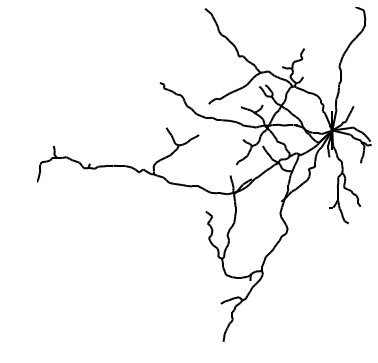

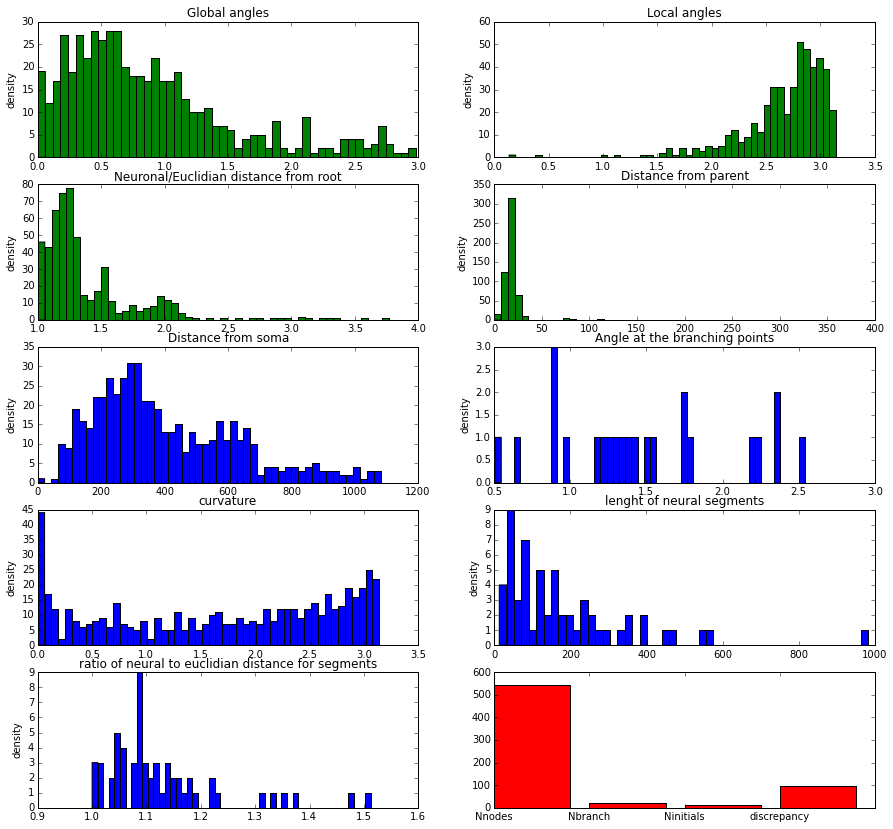

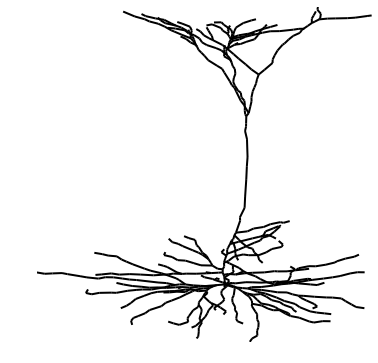

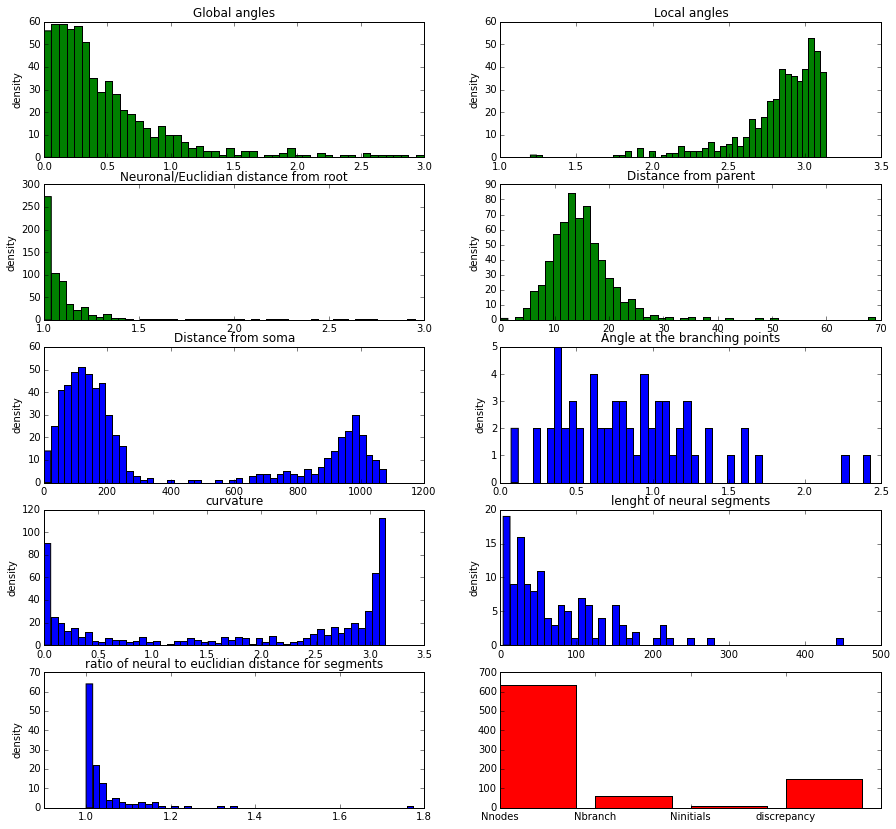

In [1]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
L_neuron = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/pyramidal")
Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L_neuron[1500])
#inter2 = Inter2.subsample_given_n_node(400)
feature_neuron = Feature_neuron.subsample_given_n_node(600)

Start_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L_neuron[1020])
#Start_neuron = McNeuron.Neuron(file_format = 'swc', input_file = L_neuron[1503])
Start_neuron.location *= 9
Start_neuron.set_nodes_values()
Start_neuron = McNeuron.Neuron(file_format = 'only list of nodes', input_file = deepcopy(Start_neuron.nodes_list))
start_neuron = Start_neuron.subsample_given_n_node(600)
McNeuron.visualize.plot_2D(start_neuron, dpi = 120, size = 5, show_width= False,  background = .01,line_width=2)
start_neuron.show_features(15,17,50)
McNeuron.visualize.plot_2D(feature_neuron, dpi = 120, size = 5, show_width= False,  background = .01,line_width=2)
feature_neuron.show_features(15,17,50)

326


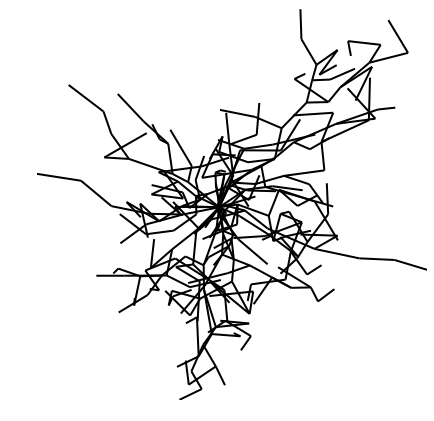

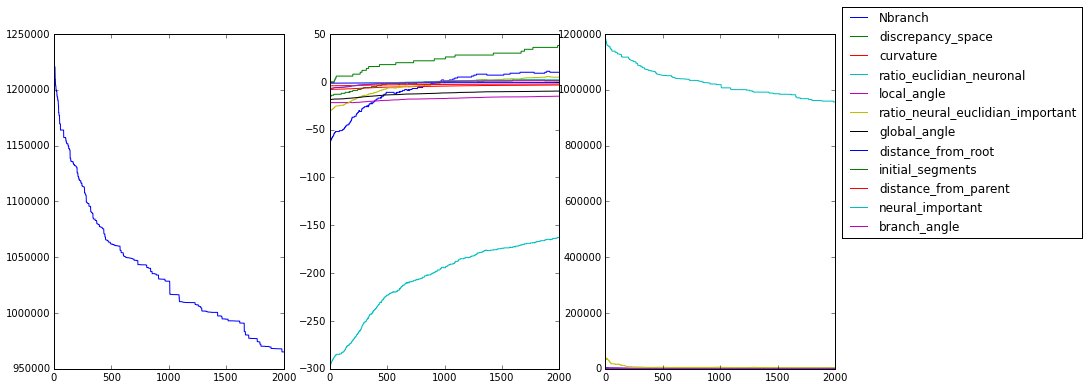

In [5]:
per = McNeuron.MCMC( iterations = 2000,n_node=1, initial_seg=1, verbose=0,mean_len_to_parent=100,var_len_to_parent=20)
#per = McNeuron.MCMC( iterations = 100,verbose=1, n_node = 200, initial_seg=1)
#per = McNeuron.MCMC(neuron=per.neuron, iterations = 5000,verbose=0)
#np.random.seed(0)
M = {'hist_range': {
    'Nbranch': np.array([1]),
    'branch_angle': np.arange(0,np.pi,np.pi/30),
    'distance_from_root': np.append(np.arange(1,1500,1),2000),
    'global_angle': np.arange(0,np.pi,np.pi/30),
    'distance_from_parent': np.append(np.arange(0,300,1),500),
    'local_angle': np.arange(0,np.pi,np.pi/30),
    'initial_segments': np.array([1]),
    'discrepancy_space': np.array([1]),
    'curvature' : np.arange(0,np.pi,np.pi/30),
    'ratio_euclidian_neuronal': np.append(np.arange(1,3,.01),np.arange(3,40,3)),
    'neural_important' : np.arange(0,600,10),
    'ratio_neural_euclidian_important' : np.arange(1,3,.01)
    },
    'hist_variance': {
    'Nbranch': 1,
    'branch_angle': .3,
    'distance_from_root': .3,
    'global_angle': 1,
    'distance_from_parent': .5,
    'local_angle': .6,
    'initial_segments': .5,
    'discrepancy_space': 10,
    'curvature' : 2,
    'ratio_euclidian_neuronal': .01 ,
   'neural_important' : .3,
    'ratio_neural_euclidian_important' : .02      
    }}
#M = {'hist_range': {'distance_from_root': np.append(np.arange(1,1500,1),2000),},
#     'hist_variance': {'distance_from_root': .01,}}
L = {
     'extension/reduction': 1.,
     'extension/reduction end points': 0.,
     'add/remove' : 0.,
     'rescale toward end' : 0,
     'diameter' : 0.,
     'diameter_toward' : 0. ,
     'rotation for any node' : 0.,
     'rotation for branching' : 0.,
     'location toward end' : 0,
     'location' : 0,
     'location for important point' : 0.,
     'sliding general' : 0,
     'sliding certain in distance' : 0.,
     'sliding for branching node' : 0,
     'sliding for branching node certain distance' : .0,
     'stretching vertical' : .0,
     'stretching horizental' : .0}
# L = {'sliding certain in distance' : .3,
#     'location for important point' : .5}
per.kappa_rotation = 400.
per.set_ratio_red_to_ext(.1)
per.rescale_value = 0
per.sliding_limit = 650.
per.horizental_stretch = .1
per.vertical_stretch = .1
per.location_toward_cte = .5
per.location_important = 5.
per.set_real_neuron(feature_neuron,M)
per.set_probability(L)
per.fit()
gen = per.neuron
McNeuron.visualize.plot_2D(gen,dpi = 120, line_width=2,size = 6);
per.show_MCMC(0,14,6)
# per.neuron.show_features(15,17,20)
# print sum(per.trend[:,-1:])
# per.set_verbose(1)
# per.set_initial_neuron(deepcopy(per.neuron))
# per.set_real_neuron(feature_neuron,M)
# per.set_probability(L)
# per.ite = 1
# per.fit()

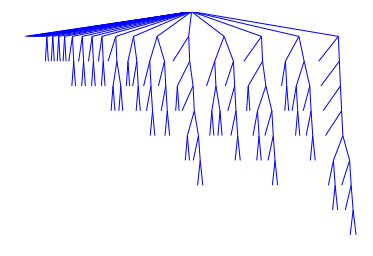

In [7]:
McNeuron.visualize.plot_dedrite_tree(per.neuron)
#McNeuron.visualize.plot_dedrite_tree(Feature_neuron)

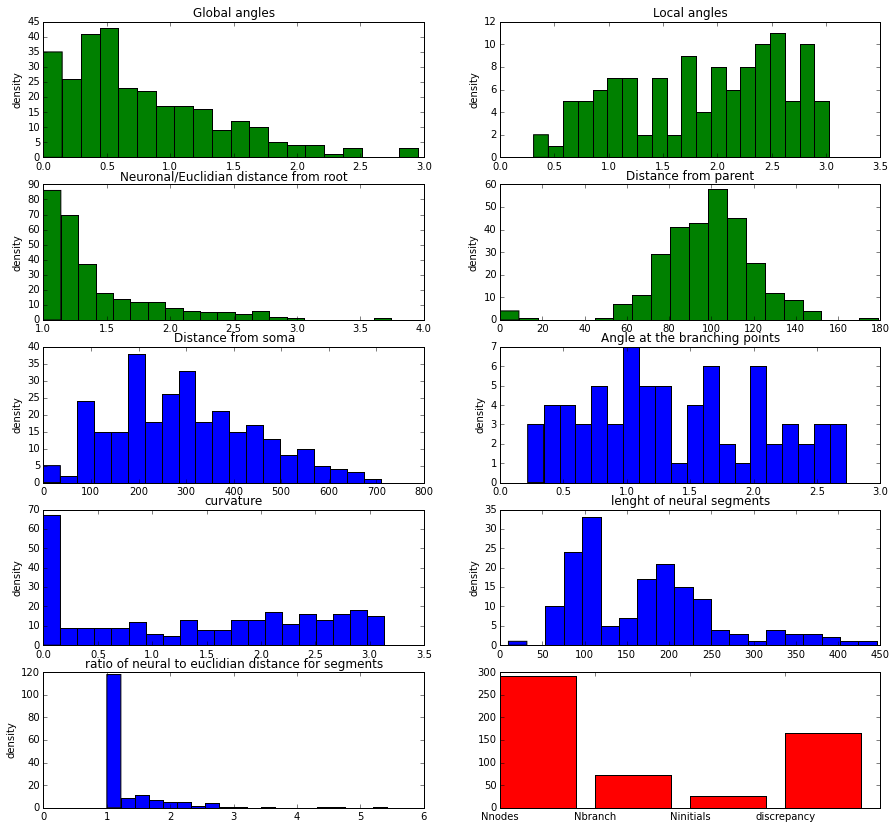

In [6]:
per.neuron.show_features(15,17,20)

In [ ]:
per.neuron.branch_order